<a href="https://colab.research.google.com/github/ShriomiGite/NLP/blob/main/Fake_and_true_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
df=pd.read_csv("/content/news (1).csv")
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


In [7]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [8]:
df['Title']=df['title']+" "+df['text']

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   label   44898 non-null  object
 3   Title   44898 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [9]:
df.drop(df[['title','text']],axis=1)

,label,Title
0,fake,Donald Trump Sends Out Embarrassing New Year’...
1,fake,Drunk Bragging Trump Staffer Started Russian ...
2,fake,Sheriff David Clarke Becomes An Internet Joke...
3,fake,Trump Is So Obsessed He Even Has Obama’s Name...
4,fake,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
44893,true,'Fully committed' NATO backs new U.S. approach...
44894,true,LexisNexis withdrew two products from Chinese ...
44895,true,Minsk cultural hub becomes haven from authorit...
44896,true,Vatican upbeat on possibility of Pope Francis ...


In [40]:
#to merge all the titles
fake=" ".join(df[df['label']=="fake"]['Title'])
true=" ".join(df[df["label"]=="true"]['Title'])

#Wordcloud

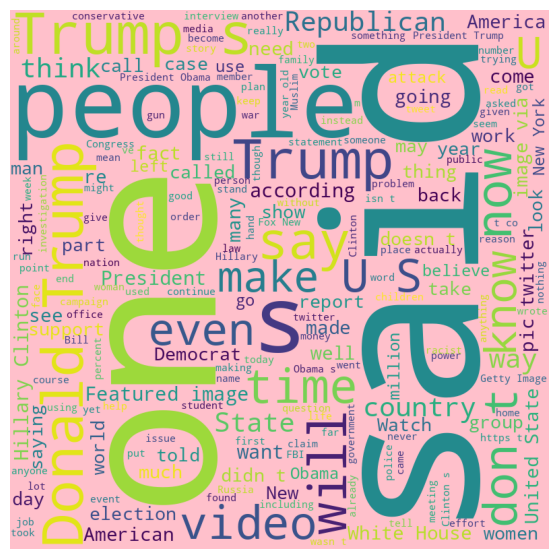

In [58]:


wc=WordCloud(height=800,width=800,background_color="pink",min_font_size=10)
wc.generate(fake)

plt.figure(figsize=(10,7))
plt.imshow(wc)
plt.axis("off")
plt.show()
   

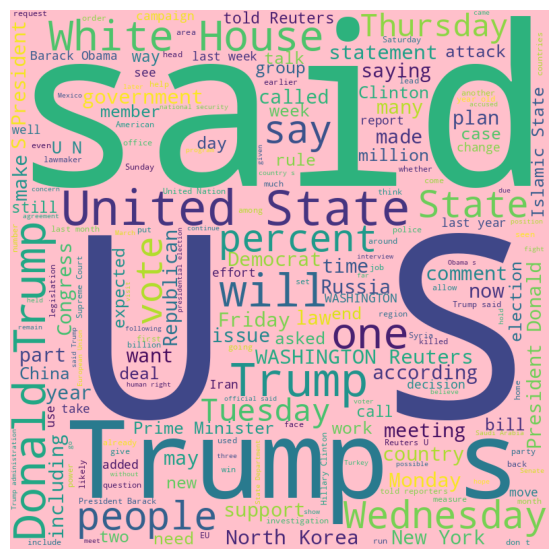

In [57]:
wc=WordCloud(height=800,width=800,background_color="pink",min_font_size=10)
wc.generate(true)

plt.figure(figsize=(10,7))
plt.imshow(wc)
plt.axis("off")
plt.show()
   

In [59]:
x=df.Title
y=df.label

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

#Count Vectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words="english")

In [62]:
xtrain_cv=cv.fit_transform(xtrain)
xtest_cv=cv.transform(xtest)

#Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [64]:
model.fit(xtrain_cv,ytrain)

DecisionTreeClassifier()

In [65]:
ypred=model.predict(xtest_cv)

In [66]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      7053
        true       1.00      0.99      1.00      6417

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [74]:
text1=" Donald Trump Sends Out Embarrassing New Yearâ€™s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters"
text2="As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "

In [75]:
text1_cv=cv.transform([text1])

In [76]:
pred=model.predict(text1_cv)[0]
pred

'fake'

In [77]:
text2_cv=cv.transform([text2])

In [78]:
pred=model.predict(text2_cv)[0]
pred

'true'

#Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain_cv,ytrain)

RandomForestClassifier()

In [81]:
ypred=model.predict(xtest_cv)

In [82]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      7053
        true       0.99      0.99      0.99      6417

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [83]:
pred=model.predict(text1_cv)[0]
pred

'fake'

In [84]:
pred=model.predict(text2_cv)[0]
pred

'true'

#We can see that both the models are performing perfectly well.